In [ ]:
!pip install d2l==1.0.0-beta0

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, num_hiddens_1, num_hiddens_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens_1), nn.ReLU(), nn.LazyLinear(num_hiddens_2), nn.ReLU(), nn.LazyLinear(num_outputs))

In [5]:
@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        Y_hat = self(*batch[:-1])
        self.plot('loss', l, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return l

In [6]:
@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

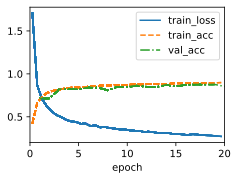

In [7]:
model = MLP(num_outputs=10, num_hiddens=256, num_hiddens_1=128, num_hiddens_2=64, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

In [ ]:
net = MLP(num_outputs=10, num_hiddens=256, num_hiddens_1=128, num_hiddens_2=64, lr=0.1)

In [ ]:
torch.save(net.state_dict(), 'mlp.params')